# Prova 2 de Inteligência Artificial
### Aluna: Sarah Andrade Toscano de Carvalho  
### Matrícula:20170022895    --    Profª: Thaís Gaudencio

## Questão 1

Acessar a base de dados HCV (https://archive.ics.uci.edu/ml/datasets/HCV+data#) e desenvolver dois algoritmos supervisionados, podendo ser Redes Neurais Artificiais, Árvore de Decisão ou outros de sua escolha, para classificação entre Doador ou Não Doador, que são positivos para Hepatite C, Fibrose ou Cirrose. Ambos modelos devem ser analisados pelas métricas: Acurácia, Especificidade, Sensibilidade e Matriz de Confusão e os resultados devem ser discutidos. Na base consta instâncias rotuladas como Possíveis Doadores (0s=suspect Blood Donor), que devem ser classificadas separadamente após a construção dos modelos, compare os resultados obtidos em cada método utilizado.

### Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Importação da base de dados

In [86]:
dataset = pd.read_csv('./database/data-Q1.csv', delimiter=',', index_col=0)

### Pré-processamento

#### Verificação de dados nulos

In [95]:
dataset.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

#### Divisão do dataset em dados de entrada (x) e de saída (y)

In [96]:
x = dataset.iloc[:, 1:].values
print(x)

[[32 'm' 38.5 ... 106.0 12.1 69.0]
 [32 'm' 38.5 ... 74.0 15.6 76.5]
 [32 'm' 46.9 ... 86.0 33.2 79.3]
 ...
 [64 'f' 29.0 ... 66.7 64.2 82.0]
 [46 'f' 33.0 ... 52.0 50.0 71.0]
 [59 'f' 36.0 ... 67.0 34.0 68.0]]


In [81]:
y = dataset.iloc[:, 0:1].values
print(y)

[['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood Donor']
 ['0=Blood D

In [97]:
#dimensão dos dados
x.shape

(615, 12)

#### 📈 Análise Gráfica antes do pré-processamento dos dados ausentes

Text(0.5, 1.0, 'ALP')

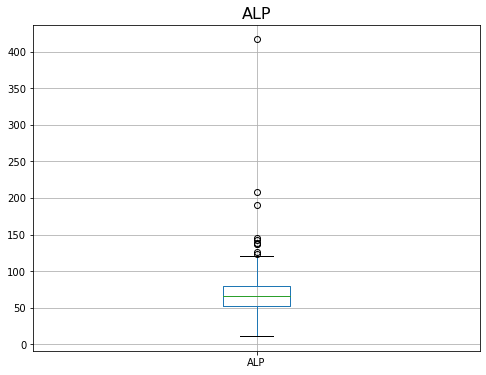

In [108]:
dataset["ALP"].plot.box(grid = True, figsize=(8,6))
plt.title('ALP', fontsize=16)

Text(0.5, 1.0, 'CHOL')

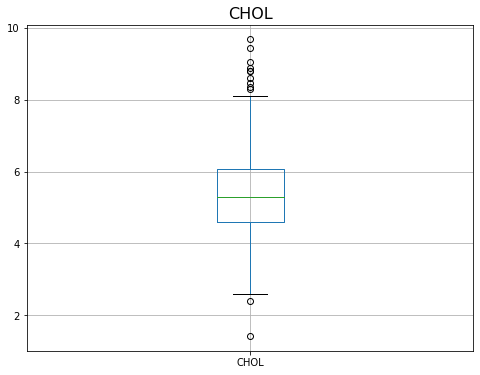

In [109]:
dataset["CHOL"].plot.box(grid = True, figsize=(8,6))
plt.title('CHOL', fontsize=16)

#### Tratando dados ausentes, substituição pela mediana


In [99]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(x[:, 2:])
x[:, 2:] = imputer.transform(x[:, 2:])